# Ridhima Taneja                                         21BCE2188

## Machine Learning Lab Assignment 3

### Question 1

Apply SVM classifier for the dataset “Breast Cancer” from UCI repository.

In [1]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, hinge_loss

In [2]:
# Load the Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Task 1: Use Linear Kernel for training. Find the models efficiency using evaluation 
metrics.

In [5]:
# Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Predict on test data
y_pred_linear = svm_linear.predict(X_test)

# Evaluate the model
print("Accuracy (Linear Kernel):", accuracy_score(y_test, y_pred_linear))
print("Classification Report (Linear Kernel):\n", classification_report(y_test, y_pred_linear))


Accuracy (Linear Kernel): 0.9766081871345029
Classification Report (Linear Kernel):
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Task 2: Use non-linear Kernel for training. Find the models efficiency using 
evaluation metrics

In [6]:
# Train SVM with RBF Kernel (non-linear)
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Predict on test data
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate the model
print("Accuracy (RBF Kernel):", accuracy_score(y_test, y_pred_rbf))
print("Classification Report (RBF Kernel):\n", classification_report(y_test, y_pred_rbf))


Accuracy (RBF Kernel): 0.9766081871345029
Classification Report (RBF Kernel):
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Task 3: : Apply Hinge Loss evaluation function to measure the distance of data points
from the decision boundary

In [7]:
# Calculate the decision function for linear kernel
decision_function = svm_linear.decision_function(X_test)

# Compute the hinge loss for the linear kernel SVM
hinge_loss_value = hinge_loss(y_test, decision_function)
print("Hinge Loss (Linear Kernel):", hinge_loss_value)


Hinge Loss (Linear Kernel): 0.07269353135901507


### Question 2.

Apply k-means clustering for the given dataset. Download the dataset “Sales Transactions Weekly” from UCI repository

In [8]:
#import libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [9]:
# Fetch dataset
sales_transactions_weekly = fetch_ucirepo(id=396)
X = sales_transactions_weekly.data.features


In [10]:
X.head

<bound method NDFrame.head of      W0  W1  W2  W3  W4  W5  W6  W7  W8  W9  ...  Normalized 42  \
0    11  12  10   8  13  12  14  21   6  14  ...           0.06   
1     7   6   3   2   7   1   6   3   3   3  ...           0.20   
2     7  11   8   9  10   8   7  13  12   6  ...           0.27   
3    12   8  13   5   9   6   9  13  13  11  ...           0.41   
4     8   5  13  11   6   7   9  14   9   9  ...           0.27   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...            ...   
806   0   0   1   0   0   2   1   0   0   1  ...           0.00   
807   0   1   0   0   1   2   2   6   0   1  ...           0.43   
808   1   0   0   0   1   1   2   1   1   0  ...           0.50   
809   0   0   0   1   0   0   0   0   1   0  ...           0.00   
810   0   1   0   0   0   0   0   0   0   0  ...           0.00   

     Normalized 43  Normalized 44  Normalized 45  Normalized 46  \
0             0.22           0.28           0.39           0.50   
1             0.40           0.

In [11]:
# Drop normalized columns 
columns_to_drop = [col for col in X.columns if 'normalized' in col.lower()]
X_cleaned = X.drop(columns=columns_to_drop)

In [12]:
X_cleaned

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W44,W45,W46,W47,W48,W49,W50,W51,MIN,MAX
0,11,12,10,8,13,12,14,21,6,14,...,8,10,12,3,7,6,5,10,3,21
1,7,6,3,2,7,1,6,3,3,3,...,5,1,1,4,5,1,6,0,0,10
2,7,11,8,9,10,8,7,13,12,6,...,5,5,7,8,14,8,8,7,3,14
3,12,8,13,5,9,6,9,13,13,11,...,3,4,6,8,14,8,7,8,2,19
4,8,5,13,11,6,7,9,14,9,9,...,7,12,6,6,5,11,8,9,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0,0,1,0,0,2,1,0,0,1,...,1,0,0,1,0,0,2,0,0,3
807,0,1,0,0,1,2,2,6,0,1,...,4,2,4,5,5,5,6,5,0,7
808,1,0,0,0,1,1,2,1,1,0,...,0,2,2,0,0,0,4,3,0,4
809,0,0,0,1,0,0,0,0,1,0,...,0,1,1,0,0,0,2,0,0,2


Task 1: Validate K using Elbow method

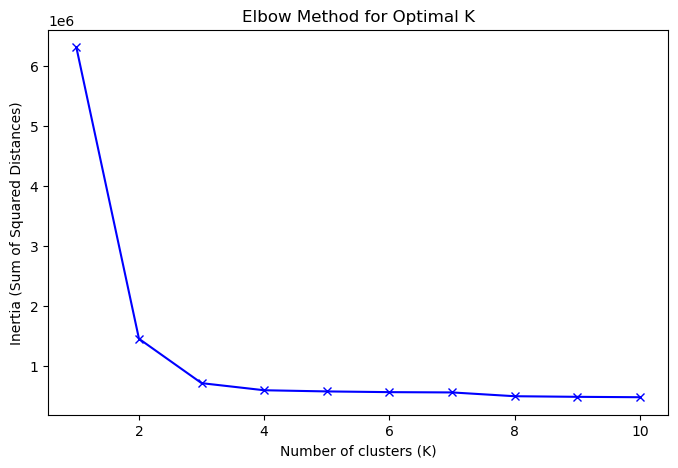

In [13]:
# Define a range of possible K values
k_range = range(1, 11)
inertia = []  # List to store the sum of squared distances for each K

# Fit KMeans for each K value and compute inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cleaned)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal K')
plt.show()

Task 2: Choose the K value using Silhouette Coefficient

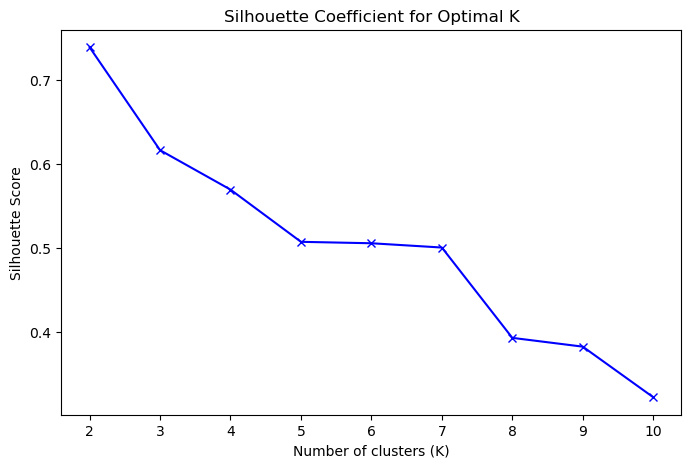

Best K based on Silhouette Score: 2


In [14]:
silhouette_scores = []

# Start from k=2 since Silhouette Score is not defined for k=1
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_cleaned)
    score = silhouette_score(X_cleaned, clusters)
    silhouette_scores.append(score)

# Plot the Silhouette Score vs. number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Coefficient for Optimal K')
plt.show()

# Print the best K based on Silhouette Score
best_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f'Best K based on Silhouette Score: {best_k}')

Task 3: Use scatter plots or other visualization techniques to visualize the clusters.

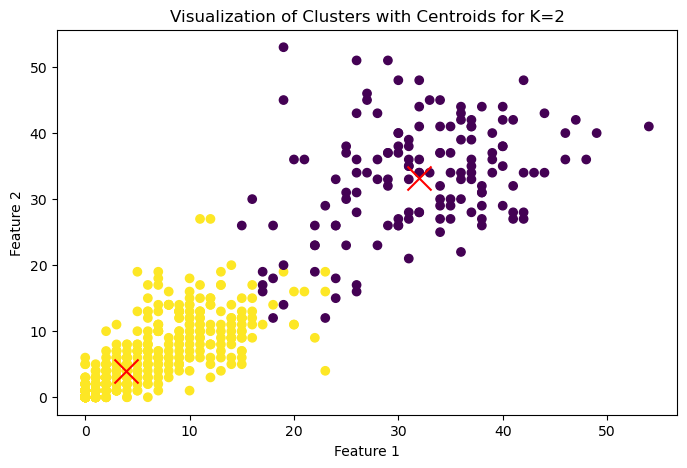

In [15]:
# Fit KMeans with the best K
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_cleaned)

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Scatter plot of the first two features with centroids
plt.figure(figsize=(8, 5))

# Plot the data points
plt.scatter(X_cleaned.iloc[:, 0], X_cleaned.iloc[:, 1], c=clusters, cmap='viridis', marker='o', label='Data points')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x', label='Centroids')

plt.title(f'Visualization of Clusters with Centroids for K={best_k}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Question 3

Apply k-modes clustering for the given dataset. Use the following dataset to find the optimal number of clusters

In [17]:
#import neccessary libraries
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

In [18]:
#create dataset
data = {
    'P1': ['blonde', 'amber', 'fair'],
    'P2': ['brunette', 'gray', 'brown'],
    'P3': ['red', 'green', 'brown'],
    'P4': ['black', 'hazel','brown'],
    'P5': ['brunette', 'amber', 'fair'],
    'P6': ['black', 'gray', 'brown'],
    'P7': ['red', 'green', 'fair'],
    'P8': ['black', 'hazel', 'fair']
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data, index=['hair_color', 'eye_color', 'skin_color'])

# Transpose the DataFrame so each person is a row
df = df.T


In [19]:
df

,hair_color,eye_color,skin_color
P1,blonde,amber,fair
P2,brunette,gray,brown
P3,red,green,brown
P4,black,hazel,brown
P5,brunette,amber,fair
P6,black,gray,brown
P7,red,green,fair
P8,black,hazel,fair


In [27]:
# Encoding categorical data
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

print(df_encoded)  

    hair_color  eye_color  skin_color
P1           1          0           1
P2           2          1           0
P3           3          2           0
P4           0          3           0
P5           2          0           1
P6           0          1           0
P7           3          2           1
P8           0          3           1


Task 1: Compare the validation methods to determine k optimal.(Elbow Curve and Silhouette Score)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 10.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 9.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 6.0
Run 1, iteration: 2/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 8.0
Init: initializing centroids
Init: initializing clusters


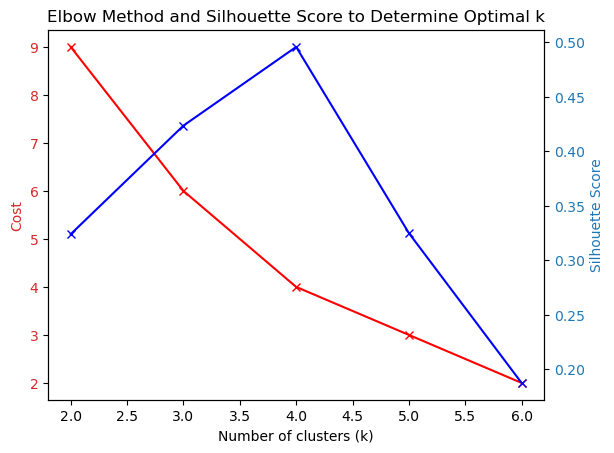

In [36]:
cost = []
silhouette_scores = []
K_range = range(2, 7)

for k in K_range:
    km = KModes(n_clusters=k, init="Huang", n_init=5, verbose=1)
    clusters = km.fit_predict(df_encoded)
    cost.append(km.cost_)
    
    # Calculate silhouette score for categorical data
    silhouette_avg = silhouette_score(df_encoded, clusters, metric='hamming')
    silhouette_scores.append(silhouette_avg)

# Plotting the Elbow method and silhouette scores
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Cost', color=color)
ax1.plot(K_range, cost, 'rx-')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(K_range, silhouette_scores, 'bx-')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Elbow Method and Silhouette Score to Determine Optimal k')
plt.show()

In [38]:
def calculate_optimal_k(inertia_values):
    #joining the first and the last point of the inertia range
    x1, y1 = 1, inertia_values[0]
    x2, y2 = len(inertia_values), inertia_values[-1]
    
    distances = []
    for i in range(len(inertia_values)):
        x0 = i + 1
        y0 = inertia_values[i]
        # Calculate the distance from each point to the line
        a = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
        b = np.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)
        dist = a / b
        distances.append(dist)

    return np.argmax(distances) + 1
opt = calculate_optimal_k(cost)
print("Optimal number of clusters is:",opt)

Optimal number of clusters is: 3


Task 2:  Use scatter plots or other visualization techniques to visualize the clusters.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 6.0
Run 1, iteration: 2/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 8.0
Best run was number 1


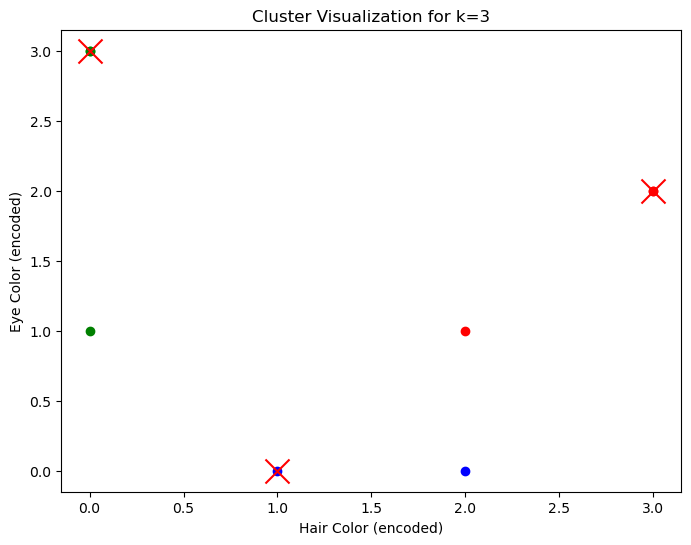

In [44]:
km = KModes(n_clusters=opt, init="Huang", n_init=5, verbose=1)
clusters = km.fit_predict(df_encoded)
centroids = km.cluster_centroids_

# Plotting cluster membership
colors = ['r', 'g', 'b']
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(clusters):
    plt.scatter(df_encoded.iloc[i, 0], df_encoded.iloc[i, 1], color=colors[cluster], label=f'Cluster {cluster+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title(f"Cluster Visualization for k={opt}")
plt.xlabel('Hair Color (encoded)')
plt.ylabel('Eye Color (encoded)')
plt.show()

Task 3: How many epochs are required to find the optimal clusters? Write a
definition to show the output of each epoch and use scatter plots for visualization
(after each epoch).

In [47]:
class KModesTracker(KModes):
    def _e_step(self, X):
        clusters = super()._e_step(X)
        self.current_clusters = clusters
        return clusters

    def fit(self, X):
        self.history = []
        super().fit(X)
        return self

    def _m_step(self, X, clusters):
        self.history.append(self.current_clusters.copy())
        return super()._m_step(X, clusters)

# Perform K-Modes clustering while tracking the epoch history
km_tracker = KModesTracker(n_clusters=opt, init="Huang", n_init=1, verbose=1)
km_tracker.fit(df_encoded)

# Visualizing the clusters after each epoch
epochs = len(km_tracker.history)
for epoch in range(epochs):
    plt.figure(figsize=(8, 6))
    clusters = km_tracker.history[epoch]
    for i, cluster in enumerate(clusters):
        plt.scatter(df_encoded.iloc[i, 0], df_encoded.iloc[i, 1], color=colors[cluster], label=f'Cluster {cluster+1}')
    plt.title(f"Cluster Visualization at Epoch {epoch+1}")
    plt.xlabel('Hair Color (encoded)')
    plt.ylabel('Eye Color (encoded)')
    plt.show()

print(f"Number of epochs to find the optimal clusters: {epochs}")


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 7.0
Number of epochs to find the optimal clusters: 0
